Please upload your submission into the google forms with the file named in the format of fullname_role.ipynb. For instance, JohnTan_JuniorAnalyst.ipynb

## Question 1

a. Write a function that generates a list of prime numbers, up till the Nth prime number.

In [2]:
def solution_1a(N):
    '''
    Type your answer below
    '''
    number = 2
    prime_numbers = []
    while len(prime_numbers) < N:
        if isPrime(number) == True:
            prime_numbers.append(number)
            number += 1
        else:
            number += 1
    return prime_numbers

def isPrime(number):
    for i in range(2, int(number / 2) + 1):
        if number % i==0:
            return False
    return True

b. Write a function that takes in an integer, N, and returns the Nth character in a string of all prime numbers concatenated together (i.e "23571113...").
<br>
<br>
<b>NOTE:</b> The string of prime numbers is not provided. <b>DO NOT HARDCODE</b> the string of prime numbers.


In [3]:
def solution_1b(N):
    '''
    Type your answer below
    '''
    prime_numbers_list = solution_1a(N)
    prime_numbers_string = ''

    for i in prime_numbers_list:
        prime_numbers_string += str(i) 
    
    return prime_numbers_string[N - 1]

## Question 2

The dataset below contains movies from the IMDb database. The dataset is messy and has plenty of errors to be corrected. 
<br>
<br>
For this section, pick <b>any 2 </b>messy columns to clean. Some examples may include:
<ul>
  <li>Ensuring columns are in the right format for use cases, and are standardised across rows</li>
  <li>Dealing with NA values or blanks</li>
  <li>Ensuring that classes in each column are standardised</li>
</ul>
<br>
<b>NOTE:</b> Indicate clearly which 2 columns are being cleaned, and the steps taken. Points are awarded based on the impact of cleaning. No extra points are awarded for cleaning more than 2 columns.

In [4]:
import pandas as pd

In [5]:
df2 = pd.read_csv("junioranalyst_q2.csv", sep=";")

In [6]:
df2.head()

,IMBD title ID,Original title,Release date,Genre,Duration,Country,Content Rating,Director,Unnamed: 8,Income,Votes,"Score,,,,"
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,NaN,$ 28815245,2.278.845,"9.3,,,,"
1,tt0068646,The Godfather,09 21 1972,"Crime, Drama",175,USA,R,Francis Ford Coppola,NaN,$ 246120974,1.572.674,"9.2,,,"
2,tt0468569,The Dark Knight,23 -07-2008,"Action, Crime, Drama",152,US,PG-13,Christopher Nolan,NaN,$ 1005455211,2.241.615,"9.,,"
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,NaN,"$ 4o8,35,783",1.098.714,"9,0"
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",,USA,R,Quentin Tarantino,NaN,$ 222831817,1.780.147,"8,9f,,"


In [7]:
## CLEAN 'RELEASE DATE' COLUMN: Cast the type of to datetime
# ParserError: Unknown string format: The 6th of marzo, year 1951
df2[df2['Release date'] == 'The 6th of marzo, year 1951'].index.values
# Index: 70
df3 = df2
df3.loc[70, 'Release date'] = 'March 6, 1951'

#ParserError: day is out of range for month: 1984-02-34
df3[df3['Release date'] == '1984-02-34'].index.values
# Index: 83
df4 = df3.drop(labels = 83, axis = 0)

#ParserError: month must be in 1..12: 1976-13-24
df4[df4['Release date'] == '1976-13-24'].index.values
# Index: 84
df5 = df4.drop(labels = 84, axis = 0)

df5['Release date'] = pd.to_datetime(df5['Release date'])


## CLEAN 'VOTES' COLUMN: Remove '.' from the 'Votes' data and convert them from string object to int
df5.replace('', float('NaN'), inplace = True)
df5.dropna(subset = ['Votes'], inplace = True)
for i in range(0, len(df5)):
    df5.iloc[i, 10] = df5.iloc[i, 10].replace('.', '')
df5['Votes'] = df5['Votes'].astype(int)

## Question 3
The dataset below contains salaries of people in data-related careers.
<br>   
Using the dataset below, come up with <b> 2 interesting visualisations </b> and describe the key insights derived from them. 

In [8]:
df6 = pd.read_csv("junioranalyst_q3.csv")

In [9]:
df6.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


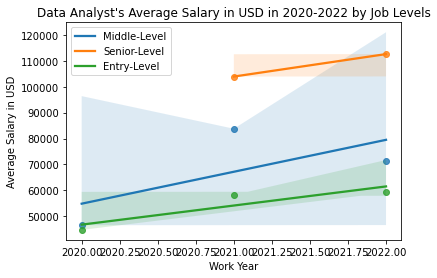

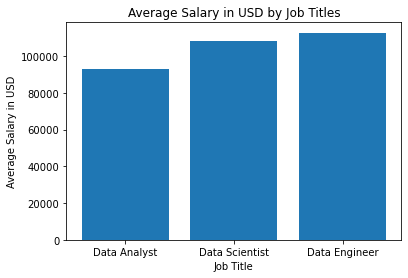

In [11]:
## Graph 1: Data Analyst's Average Salary in USD in 2020-2022 by Job Levels
# 'pip install seaborn' in the terminal
import matplotlib.pyplot as plt
import seaborn as sns
df7 = df6[df6['job_title'] == 'Data Analyst'].loc[:, ['work_year', 'experience_level', 'job_title', 'salary_in_usd']]
MI_data = df7[df7['experience_level'] == 'MI']
MI_data_mean = MI_data.groupby('work_year', as_index = False)['salary_in_usd'].mean()
SE_data = df7[df7['experience_level'] == 'SE']
SE_data_mean = SE_data.groupby('work_year', as_index = False)['salary_in_usd'].mean()
EN_data = df7[df7['experience_level'] == 'EN']
EN_data_mean = EN_data.groupby('work_year', as_index = False)['salary_in_usd'].mean()

sns.regplot(x = 'work_year', y = 'salary_in_usd', data = MI_data_mean, label = 'MI')
sns.regplot(x = 'work_year', y = 'salary_in_usd', data = SE_data_mean, label = 'SE')
sns.regplot(x = 'work_year', y = 'salary_in_usd', data = EN_data_mean, label = 'EN')
plt.legend(labels = ['Middle-Level', 'Senior-Level', 'Entry-Level'])
plt.title("Data Analyst's Average Salary in USD in 2020-2022 by Job Levels")
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.show()

##Graph 2: Average Salary in USD by Job Titles
job_title = ['Data Analyst', 'Data Scientist', 'Data Engineer']
salary_in_usd = []

data_analyst = df6[df6['job_title'] == 'Data Analyst'].loc[:, ['work_year', 'experience_level', 'job_title', 'salary_in_usd']]['salary_in_usd'].mean()
salary_in_usd.append(data_analyst)

data_scientist = df6[df6['job_title'] == 'Data Scientist'].loc[:, ['work_year', 'experience_level', 'job_title', 'salary_in_usd']]['salary_in_usd'].mean()
salary_in_usd.append(data_scientist)

data_engineer = df6[df6['job_title'] == 'Data Engineer'].loc[:, ['work_year', 'experience_level', 'job_title', 'salary_in_usd']]['salary_in_usd'].mean()
salary_in_usd.append(data_engineer)

plt.bar(job_title, salary_in_usd)
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary in USD by Job Titles')
plt.show()